In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore') # warnings 무시
%matplotlib inline

# sns Theme 
sns.set_style('darkgrid') 

# 소수점 표현 제한
pd.set_option('display.float_format', lambda x : '{:.2f}'.format(x))

# 디렉토리 내, 사용가능 파일 체크 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

house-prices-advanced-regression-techniques



Read Data


In [180]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [181]:
print(df_train.shape)
df_train.head(7)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [182]:
print(df_test.shape)
df_test.head(7)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.00,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,nan,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal


In [183]:
# save Id Column before delete
train_id = df_train['Id']
test_id = df_test['Id']

# delete Id Column
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [184]:
((df_train.isnull().sum()) / len(df_train)).sort_values(ascending=True)[:60]

MSSubClass      0.00
TotalBsmtSF     0.00
Heating         0.00
SaleCondition   0.00
CentralAir      0.00
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath    0.00
FullBath        0.00
HalfBath        0.00
BedroomAbvGr    0.00
KitchenAbvGr    0.00
KitchenQual     0.00
TotRmsAbvGrd    0.00
Functional      0.00
SaleType        0.00
YrSold          0.00
MoSold          0.00
MiscVal         0.00
PoolArea        0.00
ScreenPorch     0.00
BsmtUnfSF       0.00
3SsnPorch       0.00
OpenPorchSF     0.00
WoodDeckSF      0.00
PavedDrive      0.00
GarageArea      0.00
GarageCars      0.00
Fireplaces      0.00
EnclosedPorch   0.00
BsmtFinSF2      0.00
HeatingQC       0.00
BsmtFinSF1      0.00
MSZoning        0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType     

In [185]:
((df_test.isnull().sum()) / len(df_test)).sort_values(ascending=True)[60:80]

MSZoning       0.00
MasVnrArea     0.01
MasVnrType     0.01
BsmtFinType2   0.03
BsmtFinType1   0.03
BsmtQual       0.03
BsmtExposure   0.03
BsmtCond       0.03
GarageType     0.05
GarageQual     0.05
GarageYrBlt    0.05
GarageFinish   0.05
GarageCond     0.05
LotFrontage    0.16
FireplaceQu    0.50
Fence          0.80
Alley          0.93
MiscFeature    0.97
PoolQC         1.00
dtype: float64

Data Processing

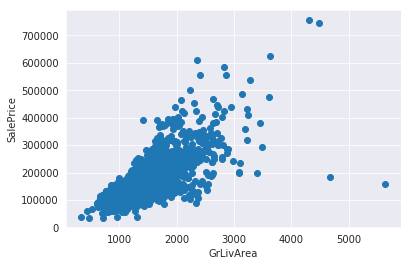

In [186]:
f, ax = plt.subplots()
ax.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

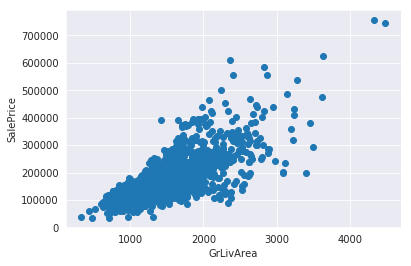

In [187]:
# Delete outlier
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] < 300000)].index)

# Delete outlier
#df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] > 700000)].index)

f, ax = plt.subplots()
ax.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

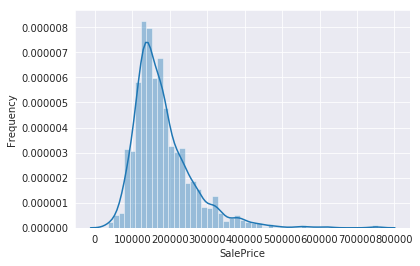

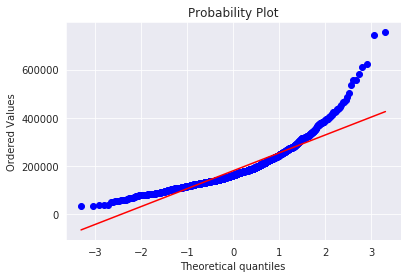

In [188]:
sns.distplot(df_train['SalePrice'])
plt.ylabel('Frequency')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

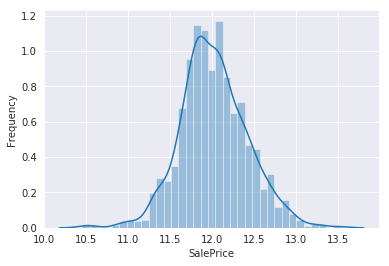

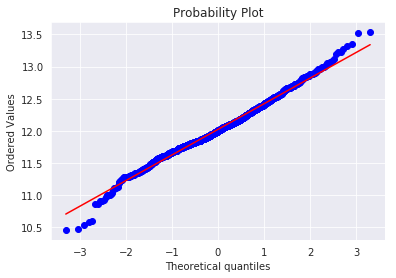

In [189]:
# for balance of 'SalePrice data'
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

sns.distplot(df_train['SalePrice'])
plt.ylabel('Frequency')


fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Feature Engineering

In [190]:
y_train = df_train['SalePrice'].values

combine = pd.concat((df_train, df_test)).reset_index(drop=True)
combine.drop(['SalePrice'], axis=1, inplace=True)
combine.shape

(2917, 79)

In [191]:
combine_nan = (combine.isnull().sum() / len(combine)) * 100
combine_nan = combine_nan.drop(combine_nan[combine_nan == 0].index).sort_values(ascending=False)[:30]
NAN_data = pd.DataFrame({"NAN data Ratio" : combine_nan})
NAN_data.head(30)
# There are 30 Features include NAN Data 

,NAN data Ratio
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
FireplaceQu,48.68
LotFrontage,16.66
GarageQual,5.45
GarageCond,5.45
GarageFinish,5.45
GarageYrBlt,5.45


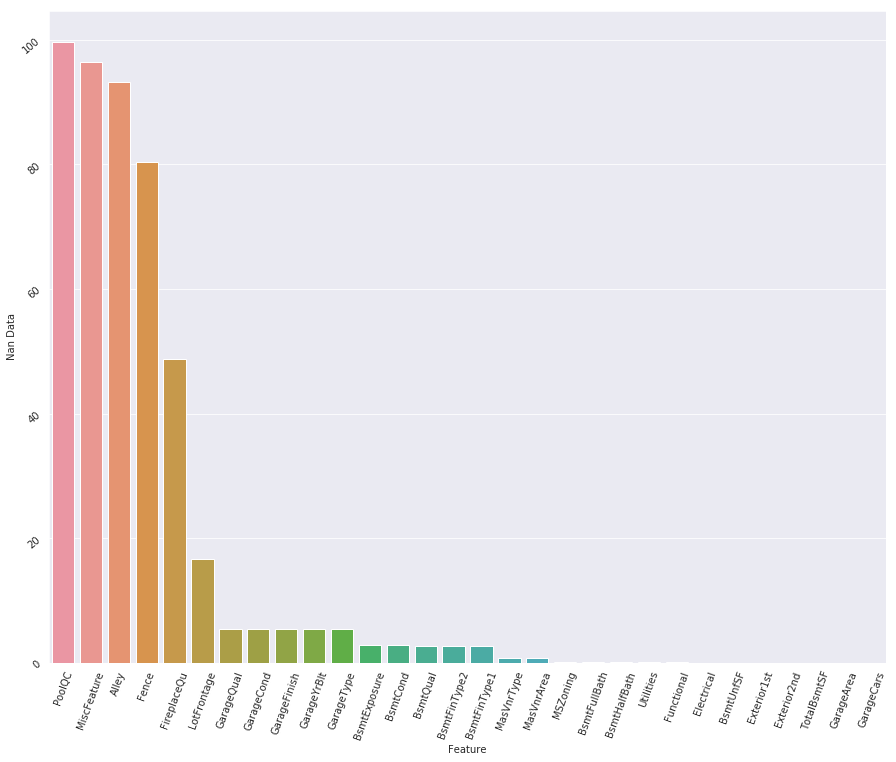

In [192]:
# Display NAN Data

f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='70')
plt.yticks(rotation='40')
sns.barplot(x=combine_nan.index, y=combine_nan)
plt.xlabel('Feature')
plt.ylabel('Nan Data')
plt.show()

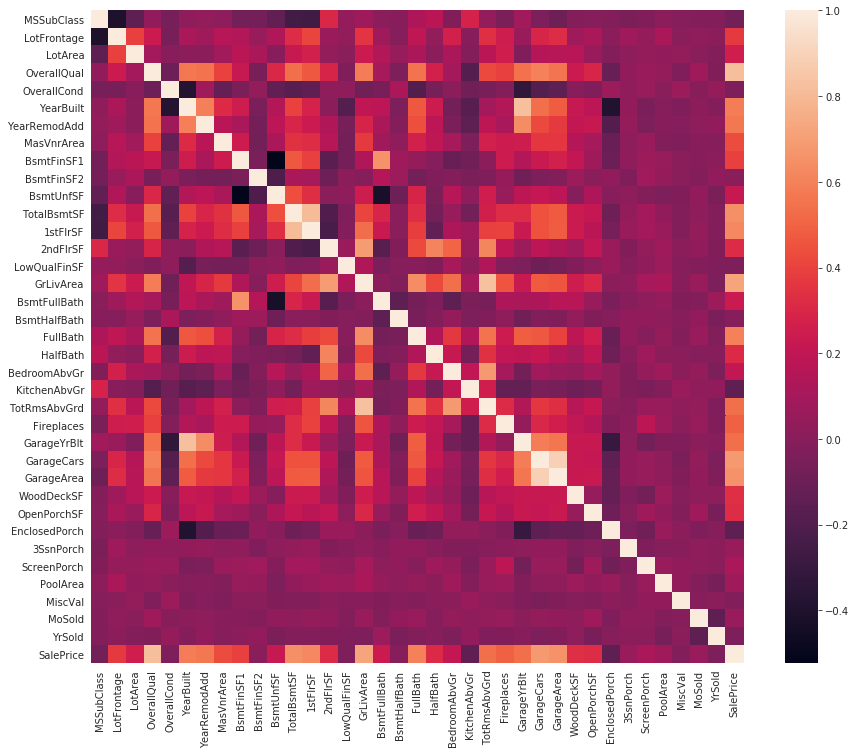

In [193]:
correlation = df_train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(correlation, vmax=1.0, square=True)

# Check the Correlation Between 'SalePrice' and 'Other Features' by Heatmap

In [194]:
NAN_data.head(30)

,NAN data Ratio
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
FireplaceQu,48.68
LotFrontage,16.66
GarageQual,5.45
GarageCond,5.45
GarageFinish,5.45
GarageYrBlt,5.45


In [195]:
# Input missing Data

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'):
    combine[col] = combine[col].fillna('None')
for col in ('MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF','TotalBsmtSF', 'GarageCars', 'GarageArea', 'BsmtFinSF2', 'BsmtFinSF1'):
    combine[col] = combine[col].fillna(0)
combine["LotFrontage"] = combine.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))
combine['MSZoning'] = combine['MSZoning'].fillna(combine['MSZoning'].mode()[0])
combine = combine.drop(['Utilities'], axis=1)
combine["Functional"] = combine["Functional"].fillna("Typ") # reference by description
combine['Electrical'] = combine['Electrical'].fillna(combine['Electrical'].mode()[0])
combine['Exterior1st'] = combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0])
combine['Exterior2nd'] = combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0])
combine['KitchenQual'] = combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0])
combine['SaleType'] = combine['SaleType'].fillna(combine['SaleType'].mode()[0])
combine['MSSubClass'] = combine['MSSubClass'].fillna("None")

In [196]:
combine_nan = (combine.isnull().sum() / len(combine)) * 100
combine_nan = combine_nan.drop(combine_nan[combine_nan == 0].index).sort_values(ascending=False)[:30]
NAN_data = pd.DataFrame({"NAN data Ratio" : combine_nan})
NAN_data.head(30)

,NAN data Ratio


Second Feature Engineering 